In [1]:
#importing libraries
import requests
import json
import pandas as pd
import sqlite3
from bs4 import BeautifulSoup
import pymongo

In [2]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [3]:
cur.execute("""SELECT * from matches where season = '2011' limit 5;""").fetchall()

[(1092, 'D1', 2011, '2012-03-31', 'Nurnberg', 'Bayern Munich', 0, 1, 'A'),
 (1093, 'D1', 2011, '2011-12-11', 'Stuttgart', 'Bayern Munich', 1, 2, 'A'),
 (1094, 'D1', 2011, '2011-08-13', 'Wolfsburg', 'Bayern Munich', 0, 1, 'A'),
 (1095, 'D1', 2011, '2011-11-27', 'Mainz', 'Bayern Munich', 3, 2, 'H'),
 (1096, 'D1', 2011, '2012-02-18', 'Freiburg', 'Bayern Munich', 0, 0, 'D')]

In [4]:
cur.execute("""SELECT * from matches where season = '2011' and HomeTeam is 'Bayern Munich' limit 5;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1122,D1,2011,2011-11-19,Bayern Munich,Dortmund,0,1,A
1,1178,D1,2011,2011-12-16,Bayern Munich,FC Koln,3,0,H
2,1197,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,H
3,1211,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,H
4,1235,D1,2011,2012-02-11,Bayern Munich,Kaiserslautern,2,0,H


In [5]:
cur.execute("""SELECT * from teams limit 5;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [6]:
cur.execute("""select HomeTeam, 
       sum(CASE WHEN FTHG > FTAG THEN 1 ELSE 0 END) as homewin,
       sum(CASE WHEN FTHG = FTAG THEN 1 ELSE 0 END) as homedraw,
       sum(CASE WHEN FTHG < FTAG THEN 1 ELSE 0 END) as homeloss,
       sum(FTHG) as HomeGF,
       sum(FTAG) as HomeGA
       from Matches
       where Season = 2011
       group by HomeTeam
       order by HomeTeam;""")
cur.execute("""select HomeTeam, 
       sum(CASE WHEN FTHG > FTAG THEN 1 ELSE 0 END) as homewin,
       sum(CASE WHEN FTHG = FTAG THEN 1 ELSE 0 END) as homedraw,
       sum(CASE WHEN FTHG < FTAG THEN 1 ELSE 0 END) as homeloss,
       sum(FTHG) as HomeGF,
       sum(FTAG) as HomeGA
       from Matches
       where Season = 2011
       group by HomeTeam
       order by HomeTeam;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,HomeTeam,homewin,homedraw,homeloss,HomeGF,HomeGA
0,Aachen,4,6,7,15,24
1,Arsenal,12,4,3,39,17
2,Aston Villa,4,7,8,20,25
3,Augsburg,6,7,4,20,19
4,Bayern Munich,14,1,2,49,6
5,Blackburn,6,1,12,26,33
6,Bochum,7,3,7,23,23
7,Bolton,4,4,11,23,39
8,Braunschweig,6,8,3,21,15
9,Chelsea,12,3,4,41,24


In [7]:
cur.execute("""select AwayTeam, 
       sum(CASE WHEN FTHG < FTAG THEN 1 ELSE 0 END) as awaywin,
       sum(CASE WHEN FTHG = FTAG THEN 1 ELSE 0 END) as awaydraw,
       sum(CASE WHEN FTHG > FTAG THEN 1 ELSE 0 END) as awayloss,
       sum(FTHG) as AwayGF,
       sum(FTAG) as AwayGF
       from Matches
       where Season = 2011
       group by AwayTeam
       order by AwayTeam;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,AwayTeam,awaywin,awaydraw,awayloss,AwayGF,AwayGF
0,Aachen,2,7,8,23,15
1,Arsenal,9,3,7,32,35
2,Aston Villa,3,10,6,28,17
3,Augsburg,2,7,8,30,16
4,Bayern Munich,9,3,5,16,28
5,Blackburn,2,6,11,45,22
6,Bochum,3,4,10,32,18
7,Bolton,6,2,11,38,23
8,Braunschweig,4,7,6,20,16
9,Chelsea,6,7,6,22,24


In [8]:
cur.execute(
"""Select
      HomeTeam as Club,
      (homewin + awaywin + homedraw + awaydraw + homeloss + awayloss) as MatchesPlayed,
      (homewin + awaywin) as Win,
      (homedraw + awaydraw) as Draw,
      (homeloss + awayloss) as Loss,
      (HomeGF+AwayGF) as GoalsFor,
      (HomeGA+AwayGA) as GoalsAgainst,
      (HomeGF+AwayGF-HomeGA-AwayGA) as GoalDiff
    from
       (select AwayTeam,
       sum(CASE WHEN FTHG < FTAG THEN 1 ELSE 0 END) as awaywin,
       sum(CASE WHEN FTHG = FTAG THEN 1 ELSE 0 END) as awaydraw,
       sum(CASE WHEN FTHG > FTAG THEN 1 ELSE 0 END) as awayloss,
       sum(FTHG) as AwayGF,
       sum(FTAG) as AwayGA
       from Matches
       where Season = 2011
       group by AwayTeam
       order by AwayTeam)
       
    join
       
       (select HomeTeam,
       sum(CASE WHEN FTHG > FTAG THEN 1 ELSE 0 END) as homewin,
       sum(CASE WHEN FTHG = FTAG THEN 1 ELSE 0 END) as homedraw,
       sum(CASE WHEN FTHG < FTAG THEN 1 ELSE 0 END) as homeloss,
       sum(FTHG) as HomeGF,
       sum(FTAG) as HomeGA
       from Matches
       where Season = 2011
       group by HomeTeam
       order by HomeTeam)
       
    on (HomeTeam==AwayTeam);""")


df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Club,MatchesPlayed,Win,Draw,Loss,GoalsFor,GoalsAgainst,GoalDiff
0,Aachen,34,6,13,15,38,39,-1
1,Arsenal,38,21,7,10,71,52,19
2,Aston Villa,38,7,17,14,48,42,6
3,Augsburg,34,8,14,12,50,35,15
4,Bayern Munich,34,23,4,7,65,34,31
5,Blackburn,38,8,7,23,71,55,16
6,Bochum,34,10,7,17,55,41,14
7,Bolton,38,10,6,22,61,62,-1
8,Braunschweig,34,10,15,9,41,31,10
9,Chelsea,38,18,10,10,63,48,15


In [9]:
team_table = df

In [10]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

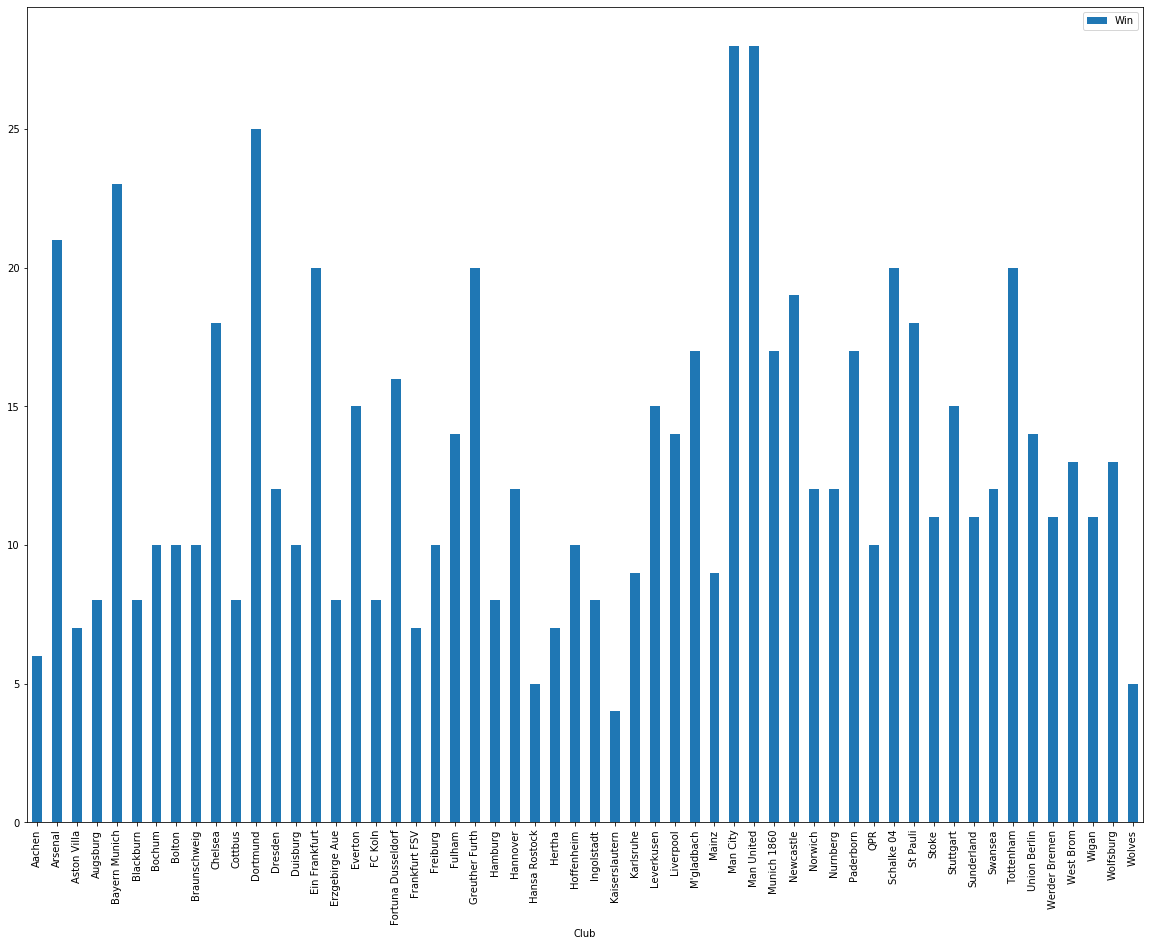

In [11]:
plt.rcParams['figure.figsize'] = (20,15)
team_table.plot.bar(x='Club', y='Win')


In [12]:
cur.execute("""select * from matches where Season = 2011;""")

df_dates = pd.DataFrame(cur.fetchall())
df_dates.columns = [x[0] for x in cur.description]
df_dates

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


In [13]:
unique_dates = df_dates['Date'].value_counts().reset_index().drop(['Date'], axis=1)
unique_dates.rename(columns = {'index':'Date'}, inplace=True)
unique_dates


,Date
0,2012-04-07
1,2012-03-03
2,2011-11-26
3,2011-09-24
4,2012-03-24
...,...
160,2012-03-05
161,2011-09-19
162,2011-08-29
163,2011-08-08


In [14]:
from datetime import datetime

In [15]:
unique_dates['Date'] = pd.to_datetime(unique_dates['Date'], format='%Y-%m-%d')
date_list = unique_dates['Date'].tolist()
type(date_list[1])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
def uniq_date(date_list):
    uniq_list = []
    for date in date_list:
        uniq_list.append(int(datetime.timestamp(date)))
    return uniq_list

In [17]:
uniq_zero = uniq_date(date_list)[1]

In [18]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [19]:
api_key = get_keys('/Users/DirkStrong1/.secret/darksky_api.json')['api_key']

In [20]:
api_key

'e9729686d50052590ed740eb31ebde0b'

In [21]:
#url = f'https://api.darksky.net/forecast/{api_key}/{lat_berlin},{long_berlin},{date}?exclude=currently,minutely,hourly,alerts'
lat_berlin = 52.5200
long_berlin = 13.4050
date = 'haha'

url = f'https://api.darksky.net/forecast/{api_key}/{lat_berlin},{long_berlin},{date}\
?exclude=currently,minutely,hourly,alerts,flags'


In [22]:
print(url)

https://api.darksky.net/forecast/e9729686d50052590ed740eb31ebde0b/52.52,13.405,haha?exclude=currently,minutely,hourly,alerts,flags


In [23]:
'https://api.darksky.net/forecast/api_key/52.5200,13.4050,1328947200.0'

'https://api.darksky.net/forecast/api_key/52.5200,13.4050,1328947200.0'

In [30]:
response = requests.get(f'https://api.darksky.net/forecast/\
{api_key}/{lat_berlin},{long_berlin},{uniq_zero}\
?exclude=currently,minutely,hourly,alerts,flags')
response.json()

{'latitude': 52.52,
 'longitude': 13.405,
 'timezone': 'Europe/Berlin',
 'daily': {'data': [{'time': 1330729200,
    'summary': 'Clear throughout the day.',
    'icon': 'clear-day',
    'sunriseTime': 1330753720,
    'sunsetTime': 1330793439,
    'moonPhase': 0.34,
    'precipIntensity': 0,
    'precipIntensityMax': 0,
    'precipProbability': 0,
    'temperatureHigh': 48.7,
    'temperatureHighTime': 1330779600,
    'temperatureLow': 34.81,
    'temperatureLowTime': 1330837200,
    'apparentTemperatureHigh': 43.94,
    'apparentTemperatureHighTime': 1330779600,
    'apparentTemperatureLow': 26.31,
    'apparentTemperatureLowTime': 1330844400,
    'dewPoint': 26.4,
    'humidity': 0.65,
    'windSpeed': 7.4,
    'windGust': 14,
    'windGustTime': 1330783200,
    'windBearing': 96,
    'uvIndex': 0,
    'uvIndexTime': 1330729200,
    'visibility': 6.099,
    'temperatureMin': 29.42,
    'temperatureMinTime': 1330750800,
    'temperatureMax': 48.7,
    'temperatureMaxTime': 1330779600,


In [38]:
if response.status_code == 200:
    response_dict = response.json()

    days = response_dict['daily']
        #data_dict = day_dict['data']
        #weather_dict = day_dict['icon']
    
    

    for day_dict in days:
        data_dict = day_dict['data']
    print(data_dict['icon'])

d
